# Linear Regression

Primero hagámos una función que grafique rectas para tener el ejemplo más preciso.

$y=ax+b$.

In [5]:
def lineplot(a,b):
    """
    inputs: 
        a: vector de pendientes
        b: vector de interceptos
    output:
        Gráfica de rectas
    """
    for i in range(len(a)):
        x=list(range(1,10))
        y=a[i]*np.array(x)+b[i]
        plt.plot(x,y,label=f"y={a[i]}x+{b[i]}")
        plt.legend()
    plt.show()

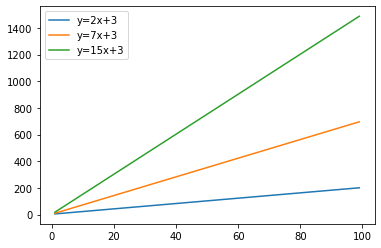

In [110]:
lineplot([2,7,15],[3,3,3])

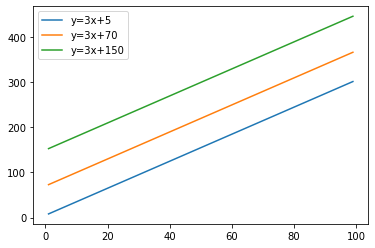

In [112]:
lineplot([3,3,3],[5,70,150])

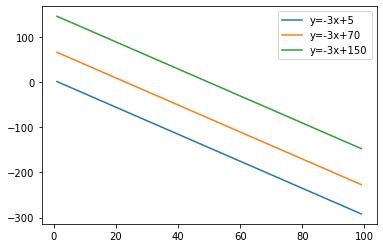

In [113]:
lineplot([-3,-3,-3],[5,70,150])

## <span style="color:red"> Generando los datos para el ejemplo </span>

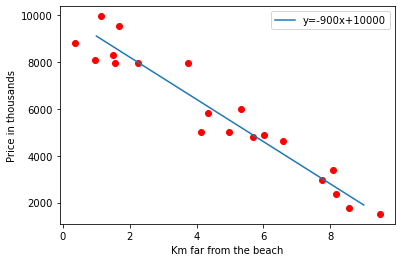

In [31]:
import random

a=-900
b=10000

error=np.random.normal(size=20)*800

km_disp=list(range(10))

distancia=np.array([random.uniform(0,10) for i in range(20)])

precio=a*distancia+error+b

plt.scatter(distancia, precio,color='red')
plt.xlabel("Km far from the beach")
plt.ylabel("Price in thousands")
lineplot([a],[b])

In [40]:
import os
os.getcwd()

'/Users/rafaeldavila/Documents/UCA/Clases/Intro_Data_Science/Clase_2_23.02.18'

In [42]:
# Mandé los datos a la base ejemplo para que después se puedan leer
base_ejm=pd.DataFrame({"precio":precio,"distancia":distancia})
base_ejm.to_csv("Precios_ejemplo.csv",index=False)

### Importando datos

In [44]:
data=pd.read_csv("Precios_ejemplo.csv")
#data

### Cuánto costará una casa con a 5.5km del mar?

Text(0, 0.5, 'Miles de pesos')

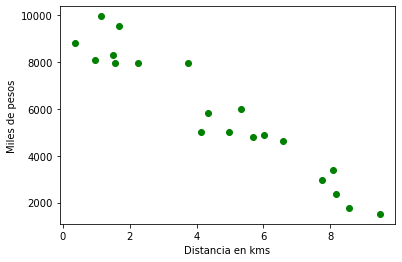

In [61]:
plt.scatter(data["distancia"],data["precio"],color="green")
plt.xlabel("Distancia en kms")
plt.ylabel("Miles de pesos")




# Mínimos cuadrados ordinarios


Equation 1 $$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

Equation 2 $$\hat{\beta}_1=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

In [53]:
x=distancia.copy()
y=precio.copy()


num=sum(np.array(x-x.mean())*np.array(y-y.mean()))
den=sum(np.array(x-x.mean())**2)

b1=round(num/den,2)

b0=round(y.mean()-b1*x.mean(),2)
print(f'nuestra ecuación es Precio={round(b1,2)}*Distancia+{round(b0,2)}')



nuestra ecuación es Precio=-871.53*Distancia+9854.37


In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression

X=np.array(data["distancia"]).reshape(20,1)
y=data["precio"]

reg = LinearRegression().fit(X, y)

print(reg.coef_)

print(reg.intercept_)

print(reg.predict(np.array([[5.5]])))

[-871.53433406]
9854.391530740464
[5060.95269343]
